In [1]:
import pandas as pd
import geopandas as gpd
import libpysal
import esda
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_column', 200)

In [2]:
gdf = gpd.read_file("clean_data/master.shp")

In [3]:
gdf.shape

(944, 181)

## Constructing weight matrices

In [5]:
wq = libpysal.weights.Queen.from_dataframe(gdf)
# queen

C:\Users\fiend\Anaconda2\envs\capstone\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
 There is 1 island with id: 863.
  warnings.warn(message)


In [6]:
wq.n

944

In [7]:
wr = libpysal.weights.Rook.from_dataframe(gdf)
# root

In [8]:
wr.n

944

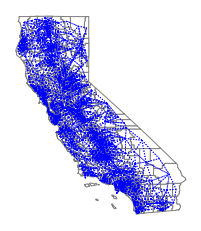

In [12]:
ax = gdf.plot(edgecolor='grey', facecolor='w')
f,ax = wq.plot(gdf, ax=ax,
        edge_kws=dict(color='b', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax.set_axis_off()

In [10]:
wr.neighbors[0]

[594, 11, 13]

In [11]:
gdf['DistrictNa'][[0, 594,11,13]]

0            Alameda Unified
594    San Francisco Unified
11           Oakland Unified
13       San Leandro Unified
Name: DistrictNa, dtype: object

In [4]:
gdf

,index,OBJECTID,Year,FedID,CDCode,CDSCode,CountyName,DistrictNa,DistrictTy,GradeLow,GradeHigh,GradeLowCe,GradeHighC,AssistStat,CongressUS,SenateCA,AssemblyCA,LocaleDist,UpdateNote,EnrollTota,EnrollChar,EnrollNonC,AAcount,AApct,AIcount,AIpct,AScount,ASpct,FIcount,FIpct,HIcount,HIpct,MRcount,MRpct,PIcount,PIpct,WHcount,WHpct,NRcount,NRpct,ELcount,ELpct,FOScount,FOSpct,HOMcount,HOMpct,MIGcount,MIGpct,SWDcount,SWDpct,SEDcount,SEDpct,UPcount,UPpct,ELATested,ELAStdMetP,MathTested,MathStdMet,CCPrepCoho,CCPrepPct,AbsentElig,AbsentPct,GradCohort,GradPct,UCCSUReqMe,DropOutPct,EnrollCumu,SuspPct,SHAPE_Leng,SHAPE_Area,district_1,unduplicat,base_grant,supplement,concentrat,total_gran,cds,District C,e_chan AA,e_chan AI,e_chan ALL,e_chan AS,e_chan EL,e_chan ELO,e_chan EO,e_chan FI,e_chan FOS,e_chan HI,e_chan HOM,e_chan MR,e_chan PI,e_chan RFP,e_chan SED,e_chan SWD,e_chan WH,e_curr AA,e_curr AI,e_curr ALL,e_curr AS,e_curr EL,e_curr ELO,e_curr EO,e_curr FI,e_curr FOS,e_curr HI,e_curr HOM,e_curr MR,e_curr PI,e_curr RFP,e_curr SED,e_curr SWD,e_curr WH,e_prio AA,e_prio AI,e_prio ALL,e_prio AS,e_prio EL,e_prio ELO,e_prio EO,e_prio FI,e_prio FOS,e_prio HI,e_prio HOM,e_prio MR,e_prio PI,e_prio RFP,e_prio SED,e_prio SWD,e_prio WH,m_chan AA,m_chan AI,m_chan ALL,m_chan AS,m_chan EL,m_chan ELO,m_chan EO,m_chan FI,m_chan FOS,m_chan HI,m_chan HOM,m_chan MR,m_chan PI,m_chan RFP,m_chan SED,m_chan SWD,m_chan WH,m_curr AA,m_curr AI,m_curr ALL,m_curr AS,m_curr EL,m_curr ELO,m_curr EO,m_curr FI,m_curr FOS,m_curr HI,m_curr HOM,m_curr MR,m_curr PI,m_curr RFP,m_curr SED,m_curr SWD,m_curr WH,m_prio AA,m_prio AI,m_prio ALL,m_prio AS,m_prio EL,m_prio ELO,m_prio EO,m_prio FI,m_prio FOS,m_prio HI,m_prio HOM,m_prio MR,m_prio PI,m_prio RFP,m_prio SED,m_prio SWD,m_prio WH,geometry
0,NaN,1,2018-19,0601770,0161119,1611190000000,Alameda,Alameda Unified,Unified,KG,12,KG,12,Differentiated Assistance,13,09,18,"21 - Suburban, Large",2018-19 District Boundary Adjustment/Correction,11260,1877,9383,825,7.300000,28,0.2,2854,25.299999,683,6.1,1960,17.400000,1310,11.6,67,0.6,3244,28.799999,289,2.6,1601,14.2,26,0.2,67,0.6,0,0.0,1289,11.4,3523,31.299999,3144,0.335,4567.0,69.400002,4587.0,59.700001,773.0,56.799999,11453.0,9.4,882.0,88.900002,58.900002,5.2,11600.0,2.6,57196.403944,4.733304e+07,Alameda Unified,0.3486,"75,938,983","5,294,466",-,"82,158,116",1611190000000,11190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-13606221.352 4540862.002, -13..."
1,NaN,2,2018-19,0601860,0161127,1611270000000,Alameda,Albany City Unified,Unified,KG,12,KG,12,General Assistance,13,09,15,"21 - Suburban, Large",2018-19 District Boundary Adjustment/Correction,3682,0,3682,111,3.000000,4,0.1,1063,28.900000,47,1.3,592,16.100000,510,13.9,6,0.2,1163,31.600000,186,5.1,583,15.8,2,0.1,12,0.3,0,0.0,312,8.5,777,21.100000,1118,0.304,1773.0,79.199997,1795.0,72.000000,302.0,62.599998,3763.0,6.4,301.0,94.699997,63.900002,1.7,3830.0,1.9,12870.772156,7.161276e+06,Albany City Unified,0.2833,"29,644,972","1,679,684",-,"31,352,540",1611270000000,11270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-13612889.056 4565138.930, -13612894..."
2,NaN,3,2018-19,0604740,0161143,1611430000000,Alameda,Berkeley Unified,Unified,KG,12,KG,12,Differentiated Assistance,13,09,15,"12 - City, Midsize",2018

In [13]:
y = gdf['UPpct']

## Calculating Moran's I

`Moran's I` is a global measure of spatial autocorrelation, which is similar to a correlation coeffecient in that it varies between maximum -1 and 1; a value toward -1 indicates uniform dispersion of the variable, while a value toward 1 indicates clustering. A Moran's I of 0 would indicate spatial randomness.  

In [15]:
from esda.moran import Moran

In [21]:
mi = Moran(y, wq)

In [23]:
mi.I
# float, non-adjusted

0.40767141327580475

A Moran's I of 0.4076 indicates global clustering on the variable (the unduplicated pupil count). This means that the disadvantaged students are concentrated in some districts. We can see this intuitively in our geopandas plot.

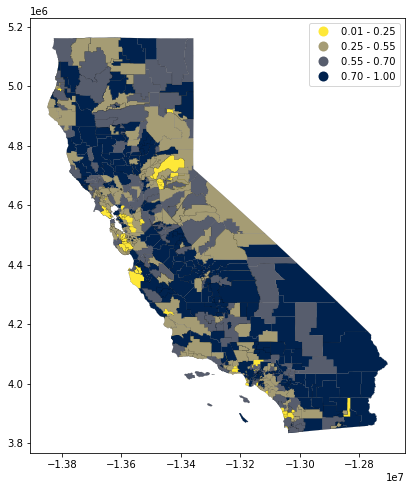

In [31]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(12, 8))

gdf.plot(
    column='unduplicat',
    legend=True,
    figsize=(15, 15),
    scheme='userdefined',
    classification_kwds={'bins':[0.25, 0.5499, 0.7, 1]},
    linewidth=.1,
    edgecolor='black',
    cmap='cividis_r',
    ax=ax
        )

#histogram, distribution of values